<a href="https://colab.research.google.com/github/dwishashah/Time-Series-Analysis/blob/main/Stationary_ADF_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test for stationary using ADF test

The Augmented Dickey-Fuller test can be used to test for a unit root in a univariate process in the presence of serial correlation.

The Augmented Dickey–Fuller (ADF) statistic, used in the test, is a negative number. The more negative it is, the stronger the rejection of the hypothesis that there is a unit root at some level of confidence.

In [ ]:
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller

In [ ]:
series = pd.read_excel('/content/India_Exchange_Rate_Dataset (1).xls', header=0, index_col=0)
series.head()

,EXINUS
observation_date,
1973-01-01,8.0041
1973-02-01,7.7538
1973-03-01,7.5465
1973-04-01,7.5462
1973-05-01,7.4927


In [ ]:
series.columns

Index(['EXINUS'], dtype='object')

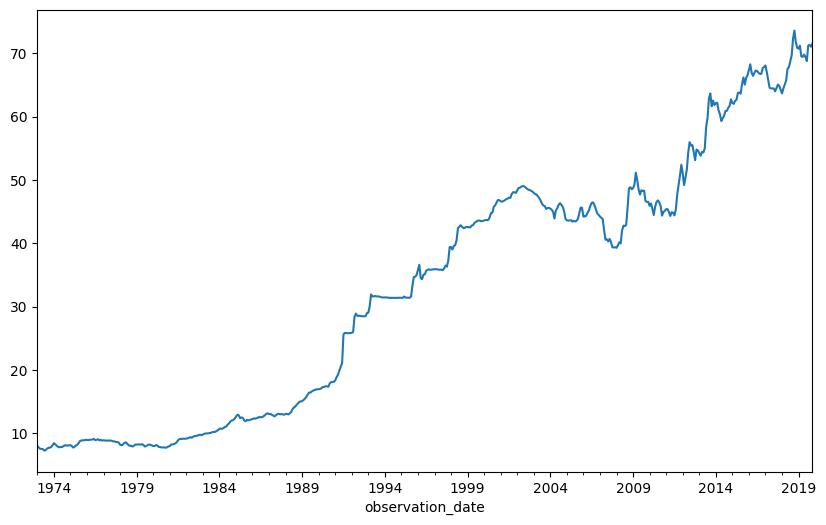

In [ ]:
series['EXINUS'].plot(figsize=(10,6))
pyplot.show()

In [ ]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='t-stat') #AIC: Method to use when automatically determining the lag length among the values 0, 1, …, maxlag
    #The t-value measures the size of the difference relative to the variation in your sample data.
    #T is simply the calculated difference represented in units of standard error.
    #The greater the magnitude of T, the greater the evidence against the null hypothesis.

    critical_value=[]
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistics','p-value','No. of lags used','No. of observations used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value #Critical values for the ADF test for 1%, 5%, and 10% significance levels with the constant model are −3.43, −2.87, and −2.57, respectively.
       critical_value.append(value)
    #print (critical_value)
    print("----------------")
    print(min(critical_value))
    print(dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [ ]:
Augmented_Dickey_Fuller_Test_func(series,'EXINUS')

Results of Dickey-Fuller Test for column: EXINUS
----------------
-3.442405720052601
Test Statistics               0.805817
p-value                       0.991729
No. of lags used             17.000000
No. of observations used    545.000000
Critical Value (1%)          -3.442406
Critical Value (5%)          -2.866858
Critical Value (10%)         -2.569602
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


<Axes: xlabel='observation_date'>

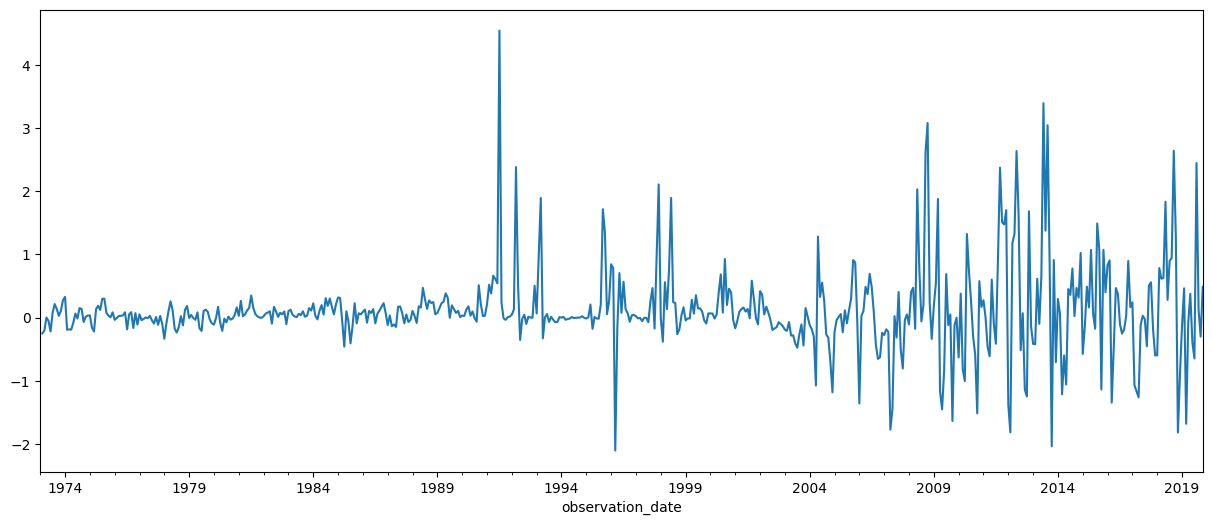

In [ ]:
series['EXINUS'].diff(1).plot(figsize=(15,6))

In [ ]:
Augmented_Dickey_Fuller_Test_func(series['EXINUS'].diff(1).dropna(),'')

Results of Dickey-Fuller Test for column: 
----------------
-3.442405720052601
Test Statistics            -6.379072e+00
p-value                     2.245677e-08
No. of lags used            1.600000e+01
No. of observations used    5.450000e+02
Critical Value (1%)        -3.442406e+00
Critical Value (5%)        -2.866858e+00
Critical Value (10%)       -2.569602e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary
